In [1]:
import re, json
import matplotlib.pyplot as plt
import numpy as np

def detregPlotLoss(txtPath, task, title, start=0, end=None):
    txt = open(txtPath,"r").read()
    txtL = re.findall("\{(.*)\}", txt) # epoch split
    plt.title(title, fontsize=16)
    plt.xlabel("epochs", fontsize=16)
    plt.ylabel("loss", fontsize=16)
    if task:
        train_loss_L = [ json.loads("{"+txtL[i]+"}")["train_loss"] for i in range(len(txtL)) ]
        plt.plot(train_loss_L[start:end])
    if task=="finetune":
        val_loss_L   = [ json.loads("{"+txtL[i]+"}")["test_loss"] for i in range(len(txtL)) ]
        plt.plot(val_loss_L[start:end])
    plt.grid('on')
    plt.show()
    n = len(train_loss_L)
    print(f"min(zip(train_loss_L,range(n)))={min(zip(train_loss_L,range(n)))}" if task=="pretext" else \
          f"min(zip(val_loss_L,range(n)))={min(zip(val_loss_L,range(n)))}")
    return train_loss_L if task=="pretext" else val_loss_L

def plotAvg(lossL, maWindow=40, criterion=-0.001):
    maSlope = [ (lossL[i+maWindow]-lossL[i])/maWindow for i in range(len(lossL)-maWindow) ]
    plt.plot(maSlope)
    plt.hlines(criterion, -1, len(lossL), colors="#FF0000") # y,xmin,xmax
    plt.grid('on')
    plt.ylim(-0.005,0) # -0.001
    plt.show()
    overCriterion = list(filter(lambda tup:tup[1]>=criterion,zip(range(len(maSlope)),maSlope)))
    print( f"over_ep={ overCriterion[0][0]+maWindow }" if overCriterion else f"last_ep={len(lossL)-1}, last slope={maSlope[-1]}" )
    return maSlope

### Pretext

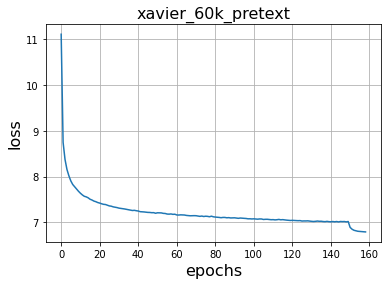

min(zip(train_loss_L,range(n)))=(6.793662592792664, 158)


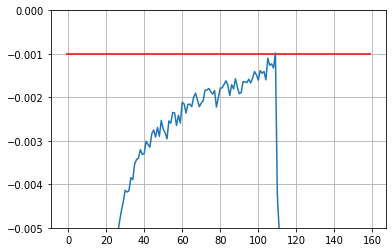

over_ep=149


In [17]:
trainL = detregPlotLoss("../_exps/pretext/xavier_60k/log.txt","pretext","xavier_60k_pretext")
maL = plotAvg(trainL)

### Downstream

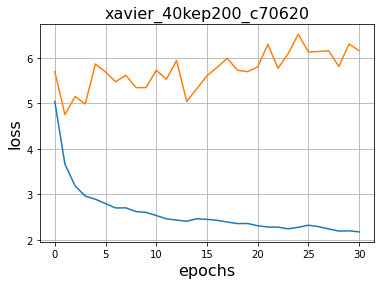

min(zip(val_loss_L,range(n)))=(4.754363064015849, 1)


In [6]:
valL = detregPlotLoss("../_exps/downstream/xavier_40k_ep200_c70620/log.txt","finetune","xavier_40kep200_c70620")

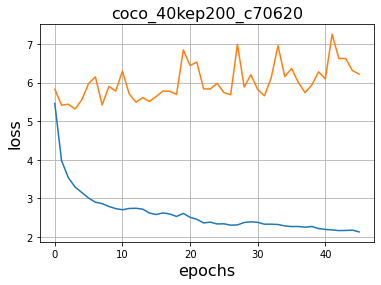

min(zip(val_loss_L,range(n)))=(5.315052692363325, 3)


In [14]:
valL = detregPlotLoss("../_exps/downstream/coco_40k_ep200_c70620/log.txt","finetune","coco_40kep200_c70620")

In [2]:
valL = detregPlotLoss("../_exps/downstream/xavier_60k_ep154_labv3/log.txt","finetune","xavier_60k_ep154_labv3")

min(zip(val_loss_L,range(n)))=(1.8375670825703847, 6)
